# Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
# pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_overview import DfOverview
from df_cleaner import DfCleaner
from df_selector import DfSelector
from vis_seaborn import *
from vis_plotly import *

## Data reading

In [4]:
df = pd.read_csv("../data/clean_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   bearer_id                146891 non-null  float64
 1   msisdn_number            146891 non-null  float64
 2   imei                     146891 non-null  float64
 3   imsi                     146891 non-null  float64
 4   last_location_name       146891 non-null  object 
 5   handset_manufacturer     146891 non-null  object 
 6   handset_type             146891 non-null  object 
 7   start                    146891 non-null  object 
 8   end                      146891 non-null  object 
 9   dur_(ms)                 146891 non-null  float64
 10  social_media_dl_(bytes)  146891 non-null  float64
 11  social_media_ul_(bytes)  146891 non-null  float64
 12  google_dl_(bytes)        146891 non-null  float64
 13  google_ul_(bytes)        146891 non-null  float64
 14  emai

The columns we would be doing this Univariate Analysis on has been given to us earlier

number of xDR sessions
Session duration
the total download(DL) and upload(UL) data
the total data volume for Applications

## Describe all  relevant variables and associated data types (slide). 

In [5]:
df.describe().transpose()

count          mean           std           min           25%           50%           75%           max
bearer_id                146891.0  1.014458e+19  2.892813e+18  6.917538e+18  7.349883e+18  7.349883e+18  1.304243e+19  1.318654e+19
msisdn_number            146891.0  3.596855e+10  8.792026e+11  3.360100e+10  3.365128e+10  3.366369e+10  3.368344e+10  3.370000e+14
imei                     146891.0  4.844173e+13  2.238835e+13  4.400152e+11  3.546071e+13  3.572181e+13  8.611970e+13  9.900120e+13
imsi                     146891.0  2.082017e+14  1.334711e+09  2.082001e+14  2.082014e+14  2.082015e+14  2.082018e+14  2.082099e+14
dur_(ms)                 146891.0  1.001881e+05  5.898605e+04  7.142000e+03  5.852700e+04  8.639900e+04  1.331545e+05  2.450958e+05
social_media_dl_(bytes)  146891.0  1.794825e+06  1.035401e+06  1.200000e+01  8.980890e+05  1.793409e+06  2.694640e+06  3.586064e+06
social_media_ul_(bytes)  146891.0  3.291553e+04  1.900524e+04  0.000000e+00  1.643100e+04  3.290800e+04  4.932650e+04  6.587000e+04
google_dl_(bytes)        146891.0  5.751422e+06  3.309586e+06  2.070000e+02  2.882586e+06  5.766576e+06  8.625551e+06  1.146283e+07
google_ul_(bytes)        146891.0  2.056556e+06  1.189824e+06  3.000000e+00  1.024412e+06  2.054878e+06  3.088072e+06  4.121357e+06
email_dl_(bytes)         146891.0  1.791751e+06  1.036007e+06  1.400000e+01  8.925730e+05  1.793613e+06  2.689786e+06  3.586146e+06
email_ul_(bytes)         146891.0  4.673270e+05  2.700067e+05  2.000000e+00  2.334390e+05  4.663570e+05  7.002850e+05  9.364180e+05
youtube_dl_(bytes)       146891.0  1.163341e+07  6.710450e+06  5.300000e+01  5.833512e+06  1.161638e+07  1.744064e+07  2.325910e+07
youtube_ul_(bytes)       146891.0  1.100858e+07  6.345243e+06  1.050000e+02  5.516549e+06  1.101329e+07  1.651411e+07  2.201196e+07
netflix_dl_(bytes)       146891.0  1.162650e+07  6.724904e+06  4.200000e+01  5.776626e+06  1.164271e+07  1.747017e+07  2.325919e+07
netflix_ul_(bytes)       146891.0  1.100286e+07  6.357359e+06  3.500000e+01  5.480202e+06  1.099939e+07  1.650352e+07  2.201196e+07
gaming_dl_(bytes)        146891.0  4.220649e+08  2.440381e+08  2.516000e+03  2.103941e+08  4.234929e+08  6.333301e+08  8.434419e+08
gaming_ul_(bytes)        146891.0  8.290257e+06  4.781553e+06  5.900000e+01  4.132622e+06  8.294516e+06  1.243239e+07  1.655879e+07
other_dl_(bytes)         146891.0  4.210038e+08  2.431448e+08  3.290000e+03  2.101527e+08  4.216332e+08  6.313683e+08  8.434425e+08
other_ul_(bytes)         146891.0  8.262887e+06  4.768594e+06  1.480000e+02  4.144489e+06  8.265817e+06  1.238204e+07  1.655882e+07
total_ul_(bytes)         146891.0  4.112139e+07  1.127775e+07  2.866892e+06  3.321835e+07  4.114253e+07  4.903488e+07  7.833131e+07
total_dl_(bytes)         146891.0  4.546628e+08  2.442080e+08  7.114041e+06  2.430767e+08  4.559702e+08  6.657831e+08  9.029696e+08
social_media             146891.0  1.827740e+06  1.035571e+06  1.563000e+03  9.313390e+05  1.825390e+06  2.727156e+06  3.650861e+06
google                   146891.0  7.807978e+06  3.517121e+06  4.033000e+04  4.943585e+06  7.815399e+06  1.068314e+07  1.552878e+07
email                    146891.0  2.259078e+06  1.071128e+06  8.359000e+03  1.359012e+06  2.263843e+06  3.159587e+06  4.518036e+06
youtube                  146891.0  2.264199e+07  9.244557e+06  1.296550e+05  1.599734e+07  2.266341e+07  2.929342e+07  4.519008e+07
netflix                  146891.0  2.262936e+07  9.259223e+06  9.843200e+04  1.598200e+07  2.263459e+07  2.928815e+07  4.519815e+07
gaming                   146891.0  4.303551e+08  2.440902e+08  3.063580e+05  2.186982e+08  4.316651e+08  6.415728e+08  8.592028e+08
other                    146891.0  4.292667e+08  2.432095e+08  1.490450e+05  2.184706e+08  4.297978e+08  6.396656e+08  8.595209e+08
total_data               146891.0  4.957842e+08  2.444416e+08  2.895611e+07  2.844850e+08  4.969243e+08  7.066379e+08  9.559848e+08

## Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.


## Non-Graphical Univariate Analysis

In [6]:
cols = ['social_media',
        'google',
        'email',
        'youtube',
        'netflix',
        'gaming',
        'other',
        'total_data']

In [7]:
# fig = px.box(df[cols])
# fig.show()

In [13]:
df[cols].describe().transpose()

count          mean           std         min          25%          50%          75%          max
social_media  146891.0  1.827740e+06  1.035571e+06      1563.0     931339.0    1825390.0    2727155.5    3650861.0
google        146891.0  7.807978e+06  3.517121e+06     40330.0    4943585.0    7815399.0   10683144.5   15528782.0
email         146891.0  2.259078e+06  1.071128e+06      8359.0    1359012.0    2263843.0    3159587.0    4518036.0
youtube       146891.0  2.264199e+07  9.244557e+06    129655.0   15997340.0   22663408.0   29293419.5   45190078.0
netflix       146891.0  2.262936e+07  9.259223e+06     98432.0   15981996.5   22634588.0   29288154.0   45198153.0
gaming        146891.0  4.303551e+08  2.440902e+08    306358.0  218698198.0  431665078.0  641572845.5  859202784.0
other         146891.0  4.292667e+08  2.432095e+08    149045.0  218470639.5  429797759.0  639665594.0  859520934.0
total_data    146891.0  4.957842e+08  2.444416e+08  28956107.0  284485027.5  496924346.0  706637912.5  955984776.0

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[cols])

In [9]:
scaled_data = pd.DataFrame(scaled_array, columns=cols)
scaled_data.head()

social_media    google     email   youtube   netflix    gaming     other  total_data
0     -0.248709 -1.393777  1.346460 -0.463631 -0.515614 -0.565074 -1.022611   -0.614279
1      0.101913 -0.964964 -1.233931  1.808328  1.397118  0.735655  0.463358    0.864836
2     -0.097978  0.688390  1.030736  1.274619  0.121160 -0.820908 -0.059037   -0.769484
3     -1.130054  1.138374 -0.175605  1.502811 -0.813977  1.556941  1.367429    1.610077
4     -0.883527 -0.016813 -0.138853  1.252662 -0.549677  0.413299  0.556531    0.457768

In [10]:
scaled_data.describe()

social_media        google         email       youtube       netflix        gaming         other    total_data
count  1.468910e+05  1.468910e+05  1.468910e+05  1.468910e+05  1.468910e+05  1.468910e+05  1.468910e+05  1.468910e+05
mean  -1.925210e-17  1.309917e-16 -8.944003e-17  9.258422e-17 -1.631107e-16 -1.006140e-17 -9.384189e-18 -9.055259e-17
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00
min   -1.763455e+00 -2.208532e+00 -2.101269e+00 -2.435207e+00 -2.433358e+00 -1.761850e+00 -1.764401e+00 -1.909780e+00
25%   -8.656132e-01 -8.144169e-01 -8.403006e-01 -7.187660e-01 -7.179205e-01 -8.671288e-01 -8.667289e-01 -8.644184e-01
50%   -2.269504e-03  2.110054e-03  4.448533e-03  2.316832e-03  5.646252e-04  5.366688e-03  2.183667e-03  4.664470e-03
75%    8.685238e-01  8.174803e-01  8.407141e-01  7.194993e-01  7.191550e-01  8.653294e-01  8.650961e-01  8.625964e-01
max    1.760503e+00  2.195214e+00  2.108960e+00  2.439075e+00  2.437448e+00  1.756929e+00  1.769074e+00  1.882667e+00

In [ ]:
# fig = px.box(scaled_data)
# fig.show()

## Graphical Univariate Analysis

In [19]:
sample = scaled_data.sample(5000)
sample = np.array(sample[cols]).reshape(8, -1)
sample.shape


(8, 5000)

In [20]:
histogram(sample, cols, .1)

In [16]:
sample[0] = sample[0]-8
sample[1] = sample[0]-6
sample[2] = sample[0]-4
sample[3] = sample[0]-2
sample[4] = sample[0]-0
sample[5] = sample[0]-2
sample[6] = sample[0]-4
sample[7] = sample[0]-6


In [17]:
histogram(sample, cols, .1)


## Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 


In [21]:
sample = scaled_data.sample(1000)
scatter(sample, x="google", y="total_data", fit='ols', mx='box', my='violin')


In [22]:
scatter(sample, x="gaming", y="total_data",
        fit='ols', mx='box', my='violin')


In [23]:
scatter(sample, x="netflix", y="total_data", fit='ols', mx='box', my='violin')


In [24]:
scatter(sample, x="other", y="total_data", fit='ols', mx='box', my='violin')

## Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [25]:
selector = DfSelector()
user_dur = selector.find_agg(df, 'msisdn_number', 'sum', 'dur_(ms)', -1, False)
user_dur

msisdn_number      dur_(ms)
105718   3.370000e+14  3.370000e+14
13381    3.362632e+10  6.052738e+11
13037    3.362578e+10  5.716382e+11
6353     3.361489e+10  5.714532e+11
36669    3.365973e+10  5.385556e+11
...               ...           ...
9        3.360102e+10  3.360102e+10
7        3.360101e+10  3.360101e+10
3        3.360101e+10  3.360101e+10
2        3.360100e+10  3.360100e+10
1        3.360100e+10  3.360100e+10

[105718 rows x 2 columns]

In [26]:
user_dur['dur_5_decile'] = pd.qcut(
    user_dur['dur_(ms)'], 5, labels=np.arange(1, 6))
user_dur

msisdn_number      dur_(ms) dur_5_decile
105718   3.370000e+14  3.370000e+14            5
13381    3.362632e+10  6.052738e+11            5
13037    3.362578e+10  5.716382e+11            5
6353     3.361489e+10  5.714532e+11            5
36669    3.365973e+10  5.385556e+11            5
...               ...           ...          ...
9        3.360102e+10  3.360102e+10            1
7        3.360101e+10  3.360101e+10            1
3        3.360101e+10  3.360101e+10            1
2        3.360100e+10  3.360100e+10            1
1        3.360100e+10  3.360100e+10            1

[105718 rows x 3 columns]

In [27]:
total_data_per_decile = user_dur.groupby('dur_5_decile').agg(
    {'dur_(ms)': 'sum'})

total_data_per_decile

dur_(ms)
dur_5_decile              
1             7.110613e+14
2             7.117028e+14
3             7.120586e+14
4             9.662529e+14
5             2.182347e+15

In [28]:
data_per_decile = selector.find_agg(
    user_dur, 'dur_(ms)', 'sum', 'dur_5_decile', -1, False)
data_per_decile


dur_(ms)  dur_5_decile
105717  3.370000e+14  3.370000e+14
105716  6.052738e+11  6.052738e+11
105715  5.716382e+11  5.716382e+11
105714  5.714532e+11  5.714532e+11
105713  5.385556e+11  5.385556e+11
...              ...           ...
5       3.360102e+10  3.360102e+10
4       3.360102e+10  3.360102e+10
3       3.360101e+10  3.360101e+10
2       3.360101e+10  3.360101e+10
1       3.360100e+10  3.360100e+10

[105717 rows x 2 columns]

## Correlation Analysis 

In [47]:
data_usage_df = df[['social_media',
                   'google',
                    'email',
                    'youtube',
                    'netflix',
                    'gaming',
                    'other', ]].copy()
data_usage_corr = data_usage_df.corr(method='pearson')
data_usage_corr


social_media    google     email   youtube   netflix    gaming     other
social_media      1.000000 -0.001919  0.004188  0.000580  0.001386  0.001901  0.005540
google           -0.001919  1.000000 -0.000049  0.002178 -0.002013 -0.000803 -0.001290
email             0.004188 -0.000049  1.000000 -0.003438  0.001499  0.000065 -0.000778
youtube           0.000580  0.002178 -0.003438  1.000000  0.003611 -0.003670  0.003235
netflix           0.001386 -0.002013  0.001499  0.003611  1.000000 -0.003532 -0.007927
gaming            0.001901 -0.000803  0.000065 -0.003670 -0.003532  1.000000 -0.002821
other             0.005540 -0.001290 -0.000778  0.003235 -0.007927 -0.002821  1.000000

[Text(0.5, 0, 'social_media'),
 Text(1.5, 0, 'google'),
 Text(2.5, 0, 'email'),
 Text(3.5, 0, 'youtube'),
 Text(4.5, 0, 'netflix'),
 Text(5.5, 0, 'gaming'),
 Text(6.5, 0, 'other')]

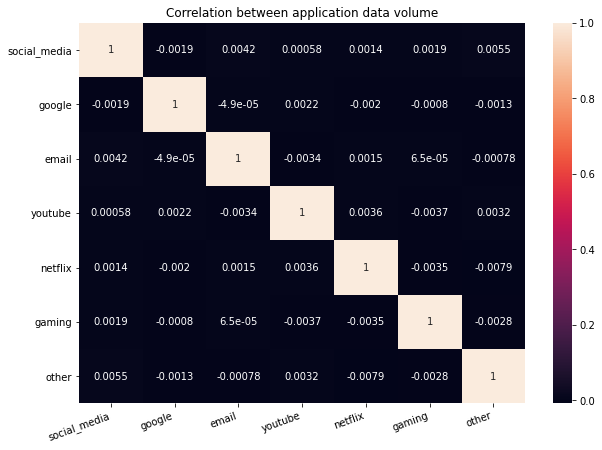

In [48]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(data_usage_corr,
                 xticklabels=data_usage_corr.columns,
                 yticklabels=data_usage_corr.columns,
                 annot=True,)
ax.set_title('Correlation between application data volume')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

In [49]:
data_usage_corr = scaled_data.corr(method='pearson')
data_usage_corr


social_media    google     email   youtube   netflix    gaming     other  total_data
social_media      1.000000 -0.001919  0.004188  0.000580  0.001386  0.001901  0.005540    0.006218
google           -0.001919  1.000000 -0.000049  0.002178 -0.002013 -0.000803 -0.001290    0.013552
email             0.004188 -0.000049  1.000000 -0.003438  0.001499  0.000065 -0.000778    0.004476
youtube           0.000580  0.002178 -0.003438  1.000000  0.003611 -0.003670  0.003235    0.034230
netflix           0.001386 -0.002013  0.001499  0.003611  1.000000 -0.003532 -0.007927    0.034391
gaming            0.001901 -0.000803  0.000065 -0.003670 -0.003532  1.000000 -0.002821    0.998255
other             0.005540 -0.001290 -0.000778  0.003235 -0.007927 -0.002821  1.000000   -0.002537
total_data        0.006218  0.013552  0.004476  0.034230  0.034391  0.998255 -0.002537    1.000000

[Text(0.5, 0, 'social_media'),
 Text(1.5, 0, 'google'),
 Text(2.5, 0, 'email'),
 Text(3.5, 0, 'youtube'),
 Text(4.5, 0, 'netflix'),
 Text(5.5, 0, 'gaming'),
 Text(6.5, 0, 'other'),
 Text(7.5, 0, 'total_data')]

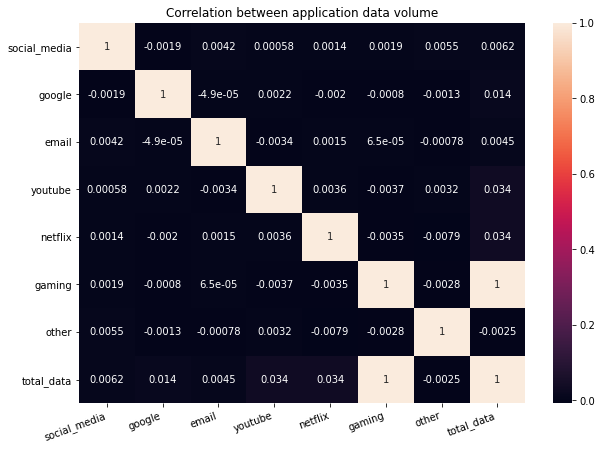

In [50]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(data_usage_corr,
                 xticklabels=data_usage_corr.columns,
                 yticklabels=data_usage_corr.columns,
                 annot=True,)
ax.set_title('Correlation between application data volume')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")


## Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 

## Data Understanding

In [ ]:
print('\nNumber of unique values => ' + str(len(df['gaming_ul'].unique())))


## Data Cleaning